In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install 'git+https://github.com/damaggu/cellSAM_devel.git@wsi#egg=cellSAM[napari]'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch

In [4]:
import cellSAM
from cellSAM import segment_wsi, get_model, segment_cellular_image
from cellSAM.utils import add_border

/home/rdilip/mambaforge/envs/cellsam_dev/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)


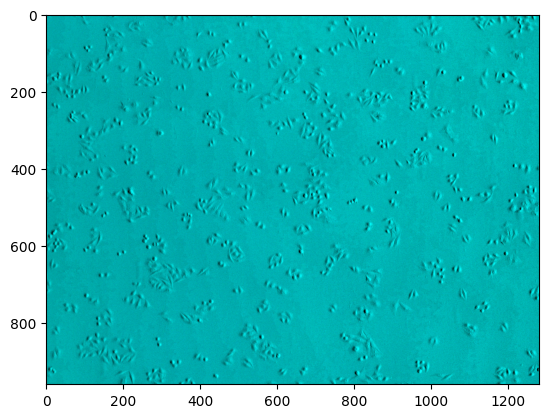

In [18]:
sd = torch.load(
    '/data/AllCellData/results/new_finetuned/everything_goodlive_neurips_tuning2_ft_box/SAM_groundtruth_boxPrompt_everything_with_good_livecell_neurips_tuning_train.pth'
)
X = np.load(
    '/data/user-data/rdilip/cellSAM/dataset/hidden/neurips/TestHidden_318.b0.X.npy'
).transpose((1,2,0))
plt.imshow(X)

In [15]:
model = get_model()
model.load_state_dict(sd, strict=False)

_IncompatibleKeys(missing_keys=[], unexpected_keys=['embedding_to_points_decoder.0.weight', 'embedding_to_points_decoder.0.bias', 'embedding_to_points_decoder.1.weight', 'embedding_to_points_decoder.1.bias', 'input_encoder.0.weight', 'input_encoder.0.bias', 'input_encoder.2.weight', 'input_encoder.2.bias', 'linear1.weight', 'linear1.bias', 'linear2.weight', 'linear2.bias'])

In [8]:
# This will throw a warning but will execute fine.
regular_pred = segment_cellular_image(X, normalize=False, device='cuda:0', fast=True)

/home/rdilip/cellsam/cellSAM/model.py:127: UserWarning: No cells detected in the image.
  warn("No cells detected in the image.")


In [17]:
# This will work fine
ws_pred = segment_wsi(X, normalize=False, device='cuda:0', model=None, fast=True)

In [ ]:
# This will throw an error
ws_pred_neurips_model = segment_wsi(X, normalize=False, device='cuda:0', model=model, fast=True)

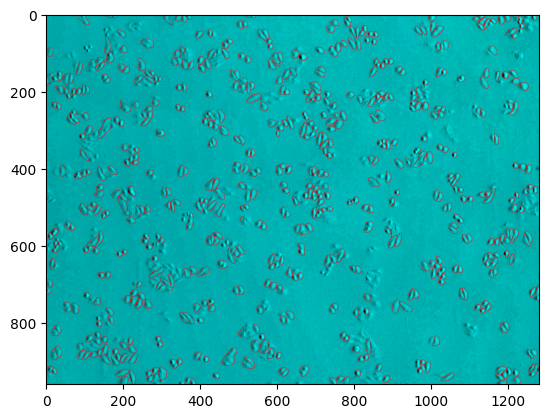

In [12]:
ann = add_border(X, ws_pred, color=[1,0,0])
plt.imshow(ann)